In [2]:
import sys
import math
import random
import os
import time as chrono
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import re

import matplotlib.pyplot as plt
import scienceplots  # type: ignore

from scipy.stats import mannwhitneyu
from BSE import market_session
from functions import schedule_offsetfn_with_flash_crash, schedule_offsetfn_from_eventlist, schedule_offsetfn_read_file

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({
    "font.size": 22,
    "axes.labelsize": 22,
    "legend.fontsize": 22,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})

['Date', 'Close', 'Volume']
['2025-02-22T00:00:00.000Z', '96,010.05', '0']
2025-02-22 00:00:00 0.0 96010.05
['2025-02-22T00:05:00.000Z', '96,047.55', '188,829,696.00']
2025-02-22 00:05:00 300.0 96047.55
['2025-02-22T00:10:00.000Z', '95,992.70', '0']
2025-02-22 00:10:00 600.0 95992.7
['2025-02-22T00:15:00.000Z', '95,904.73', '47,828,992.00']
2025-02-22 00:15:00 900.0 95904.73
['2025-02-22T00:20:00.000Z', '95,862.59', '781,873,152.00']
2025-02-22 00:20:00 1200.0 95862.59
['2025-02-22T00:25:00.000Z', '95,880.98', '83,210,240.00']
2025-02-22 00:25:00 1500.0 95880.98
['2025-02-22T00:30:00.000Z', '95,804.91', '0']
2025-02-22 00:30:00 1800.0 95804.91
['2025-02-22T00:35:00.000Z', '95,999.06', '92,192,768.00']
2025-02-22 00:35:00 2100.0 95999.06
['2025-02-22T00:40:00.000Z', '96,111.57', '0']
2025-02-22 00:40:00 2400.0 96111.57
['2025-02-22T00:45:00.000Z', '96,154.26', '161,538,048.00']
2025-02-22 00:45:00 2700.0 96154.26
['2025-02-22T00:50:00.000Z', '96,129.52', '742,199,296.00']
2025-02-22 00:

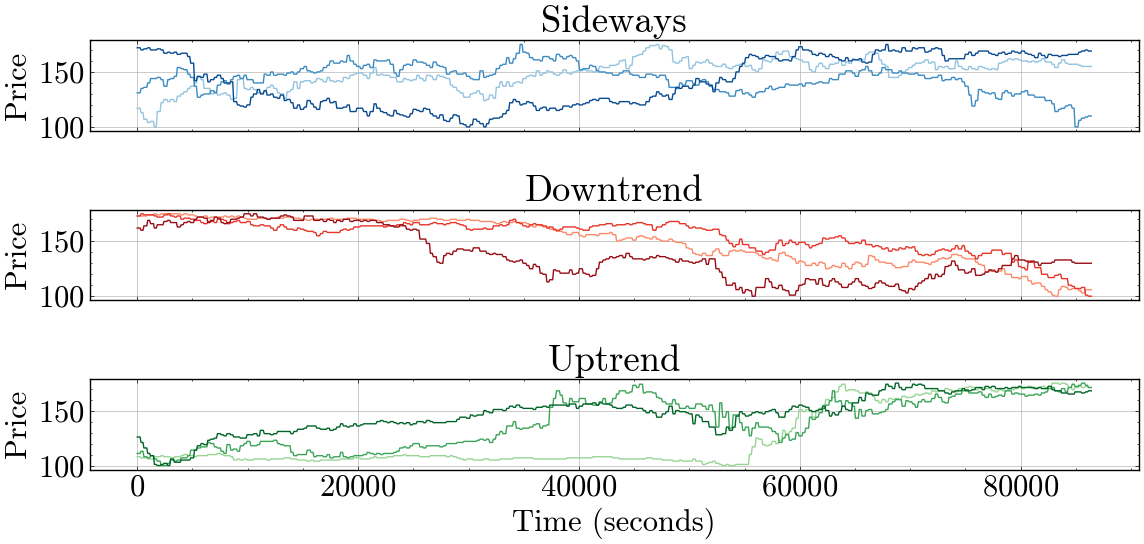

In [3]:
# folders w/data
folders = ['Sideways', 'Downtrend', 'Uptrend']
folder_offset_files = {
    "Uptrend": ["02032025.csv", "05032025.csv", "10032025.csv"],
    "Downtrend": ["9032025.csv", "24022025.csv", "25022025.csv"],
    "Sideways": ["22022025.csv", "22032025.csv", "28022025.csv"]
}

# define colormap
colormap_dict = {
    "Sideways": plt.cm.Blues,
    "Downtrend": plt.cm.Reds,
    "Uptrend": plt.cm.Greens
}

# sim params
num_days_per_session = 1
hours_per_day = 24
start_time_seconds = 0.0
end_time_seconds = 60.0 * 60.0 * hours_per_day * num_days_per_session  # 86400 seconds

# create fig
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), sharex=True)

# loop over folders
for idx, folder_name in enumerate(folders):
    ax = axs[idx] #axis
    files = folder_offset_files[folder_name] 
    cmap = colormap_dict.get(folder_name, plt.cm.viridis)
    shade_range = np.linspace(0.4, 0.9, len(files)) # adjust shde
    colors = [cmap(s) for s in shade_range]
    
    for i, file_name in enumerate(files):
        filepath = os.path.join(folder_name, file_name)

        # read offset events from file
        offset_events = schedule_offsetfn_read_file(filepath, col_t=0, col_p=1)
        t_values = np.linspace(start_time_seconds, end_time_seconds, 1000)
        average_prices = []
    
        for t in t_values:
            offset = schedule_offsetfn_from_eventlist(t, [end_time_seconds, offset_events])
            average_price = 100 + offset 
            average_prices.append(average_price)
    
        ax.plot(t_values, average_prices, color=colors[i])
    
    # rename to keep out idealised_plain_ prefix
    ax.set_title(f"{folder_name}")
    ax.set_ylabel("Price")
    ax.grid(True)

plt.xlabel("Time (seconds)")
plt.tight_layout()
#download as pdf
plt.savefig("market_plain.pdf", bbox_inches='tight')
plt.show()

['Date', 'Close', 'Volume']
['2025-02-22T00:00:00.000Z', '96,010.05', '0']
2025-02-22 00:00:00 0.0 96010.05
['2025-02-22T00:05:00.000Z', '96,047.55', '188,829,696.00']
2025-02-22 00:05:00 300.0 96047.55
['2025-02-22T00:10:00.000Z', '95,992.70', '0']
2025-02-22 00:10:00 600.0 95992.7
['2025-02-22T00:15:00.000Z', '95,904.73', '47,828,992.00']
2025-02-22 00:15:00 900.0 95904.73
['2025-02-22T00:20:00.000Z', '95,862.59', '781,873,152.00']
2025-02-22 00:20:00 1200.0 95862.59
['2025-02-22T00:25:00.000Z', '95,880.98', '83,210,240.00']
2025-02-22 00:25:00 1500.0 95880.98
['2025-02-22T00:30:00.000Z', '95,804.91', '0']
2025-02-22 00:30:00 1800.0 95804.91
['2025-02-22T00:35:00.000Z', '95,999.06', '92,192,768.00']
2025-02-22 00:35:00 2100.0 95999.06
['2025-02-22T00:40:00.000Z', '96,111.57', '0']
2025-02-22 00:40:00 2400.0 96111.57
['2025-02-22T00:45:00.000Z', '96,154.26', '161,538,048.00']
2025-02-22 00:45:00 2700.0 96154.26
['2025-02-22T00:50:00.000Z', '96,129.52', '742,199,296.00']
2025-02-22 00:

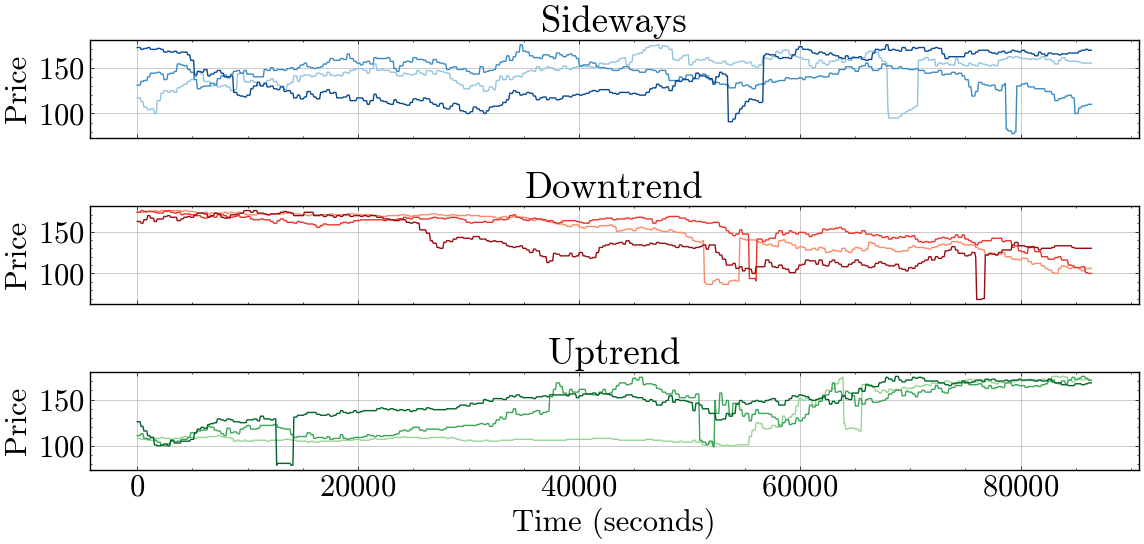

In [4]:

flash_offset = -50 

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), sharex=True)


# loop over folders
for idx, folder_name in enumerate(folders):
    ax = axs[idx] #axis
    files = folder_offset_files[folder_name] 
    cmap = colormap_dict.get(folder_name, plt.cm.viridis)
    shade_range = np.linspace(0.4, 0.9, len(files)) # adjust shde
    colors = [cmap(s) for s in shade_range]
    
    for i, file_name in enumerate(files):
        filepath = os.path.join(folder_name, file_name)

        # read offset events from file
        offset_events = schedule_offsetfn_read_file(filepath, col_t=0, col_p=1)
        t_values = np.linspace(start_time_seconds, end_time_seconds, 1000)
        crash_prices = []
    
        #CRRRRASH
        flash_start = random.randint(600, 80000) 
        flash_end = random.randint(flash_start + 300, flash_start + 3600)

        for t in t_values:
            # crash params
            fc_params = [end_time_seconds, offset_events, flash_start, flash_end, flash_offset]
            offset_val = schedule_offsetfn_with_flash_crash(t, fc_params)
            

            this_price = 100 + offset_val
            crash_prices.append(this_price)
        
        ax.plot(t_values, crash_prices, color=colors[i],
                label=f"{file_name} (flash crash)")

    ax.set_title(folder_name)
    ax.set_ylabel("Price")
    ax.grid(True)

plt.xlabel("Time (seconds)")
plt.tight_layout()
plt.savefig("markets_flash.pdf", bbox_inches='tight')
plt.show()
